In [5]:
from kan import *
import torch
from kan.MLP import MLP

device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
mlp = MLP([1,8,1], device = device, seed = 42)
kan = KAN([1,2,1], device = device, seed = 42)

checkpoint directory created: ./model
saving model version 0.0


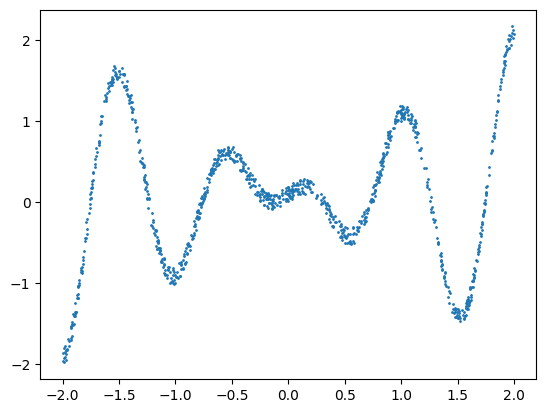

In [7]:
#create a Dataset
from kan.utils import create_dataset

y = lambda x : x[:,[0]] * torch.cos(2*torch.pi*x[:, [0]]) + torch.rand_like(x)*0.2
dataset = create_dataset(y ,n_var = 1, ranges = [-2,2], device = device)
test = dataset['test_input'].to('cpu').detach().numpy()
truth = dataset['test_label'].to('cpu').detach().numpy()
plt.scatter(test, truth,s =1)

| train_loss: 6.27e-02 | test_loss: 6.47e-02 | reg: 1.20e+01 | : 100%|█| 20/20 [00:10<00:00,  1.92it


saving model version 0.1


| train_loss: 9.39e-02 | test_loss: 9.41e-02 | reg: 1.12e+02 | : 100%|█| 50/50 [00:08<00:00,  5.90it


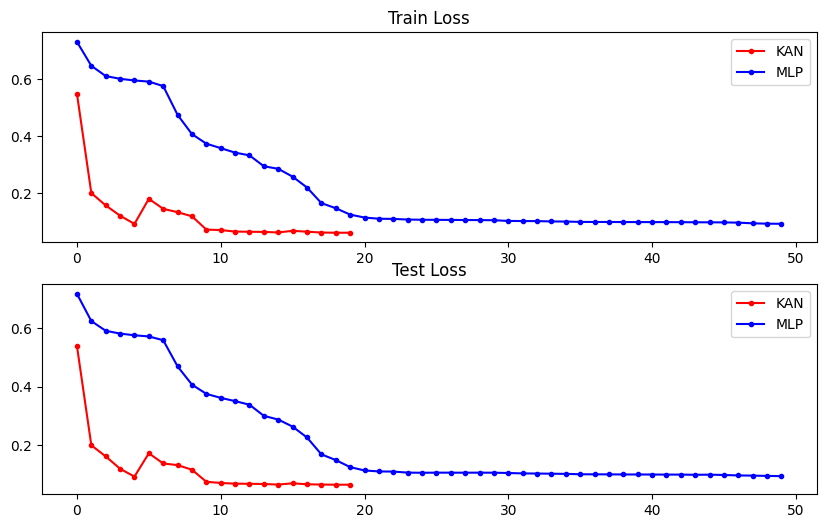

In [8]:
res = kan.fit(dataset=dataset, opt = "LBFGS", steps = 30, lamb = 0)
train_loss = res['train_loss']
test_loss = res['test_loss']

res_mlp = mlp.fit(dataset=dataset, device = device, steps = 50)
train_loss_mlp = res_mlp['train_loss']
test_loss_mlp = res_mlp['test_loss']

plt.figure(figsize=(10,6))
plt.subplot(211)
plt.title("Train Loss")
plt.plot(train_loss, '.-', color='red', label = "KAN")
plt.plot(train_loss_mlp, '.-', color = 'blue', label = "MLP")
plt.legend()

plt.subplot(212)
plt.title("Test Loss")
plt.plot(test_loss, '.-', color ='red', label = "KAN")
plt.plot(test_loss_mlp, '.-', color = 'blue', label = "MLP")
plt.legend()
plt.show()

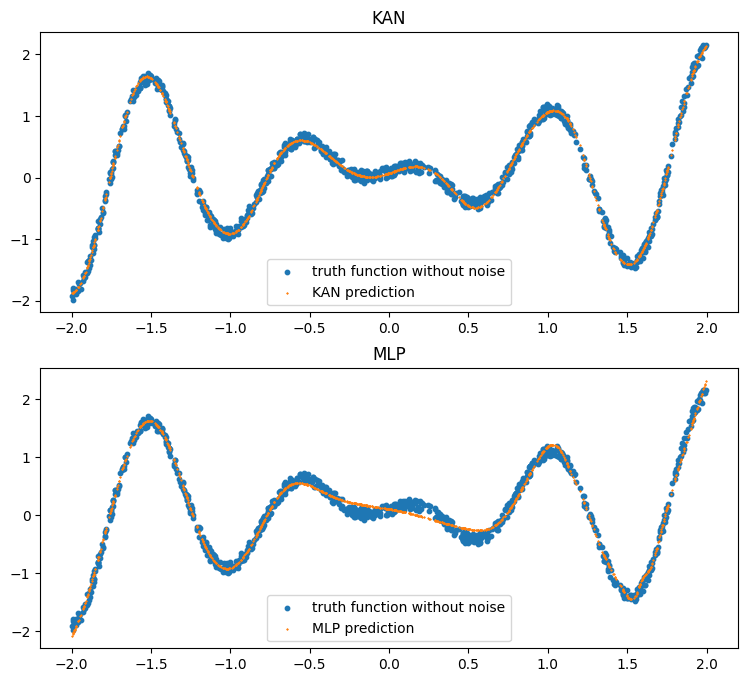

In [9]:
test = dataset['test_input']
x_ = test.to('cpu').detach()
truth_func = y(x_).detach().numpy()

predict_kan = kan(test).to('cpu').detach().numpy()
predict_mlp = mlp(test).to('cpu').detach().numpy()
plt.figure(figsize=(9, 8))
plt.subplot(211)
plt.scatter(x_.numpy(), truth_func, label="truth function without noise", s=10, marker='o')
plt.scatter(x_.numpy(), predict_kan, label="KAN prediction", s= 0.4, marker='x')
plt.title('KAN')
plt.legend()

plt.subplot(212)
plt.scatter(x_.numpy(), truth_func, label="truth function without noise", s=10, marker= 'o')
plt.scatter(x_.numpy(), predict_mlp, label="MLP prediction", s= 0.4, marker='x')
plt.title('MLP')
plt.legend()
plt.show()

